In [2]:
import pandas as pd

data = pd.read_csv("diabetes.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [6]:
print(data.isna())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

In [8]:
print(data.shape)

(768, 9)


In [21]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


In [22]:
class Diabetees_Dataset(Dataset):
    def __init__(self, filepath):
        self.data = pd.read_csv(filepath)
        self.x_data = torch.FloatTensor(self.data.drop(["Outcome"], axis=1).values)
        self.y_data = torch.FloatTensor(self.data["Outcome"].values).unsqueeze(1)
        self.len = self.data.shape[0]

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len



In [23]:
class Diabetees_Model(nn.Module):
    def __init__(self):
        super(Diabetees_Model, self).__init__()
        self.linear1 = nn.Linear(8, 6)
        self.linear2 = nn.Linear(6, 4)
        self.linear3 = nn.Linear(4, 2)
        self.linear4 = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.relu(self.linear3(x))
        x = self.sigmoid(self.linear4(x))
        return x


Epoch 0, Batch 0, Loss: 0.6925
Epoch 0, Batch 10, Loss: 0.6884
Epoch 0, Batch 20, Loss: 0.6283
Epoch 1, Batch 0, Loss: 0.6827
Epoch 1, Batch 10, Loss: 0.6000
Epoch 1, Batch 20, Loss: 0.6769
Epoch 2, Batch 0, Loss: 0.6149
Epoch 2, Batch 10, Loss: 0.6218
Epoch 2, Batch 20, Loss: 0.6618
Epoch 3, Batch 0, Loss: 0.6213
Epoch 3, Batch 10, Loss: 0.6904
Epoch 3, Batch 20, Loss: 0.5915
Epoch 4, Batch 0, Loss: 0.7326
Epoch 4, Batch 10, Loss: 0.6478
Epoch 4, Batch 20, Loss: 0.5766
Epoch 5, Batch 0, Loss: 0.6046
Epoch 5, Batch 10, Loss: 0.6330
Epoch 5, Batch 20, Loss: 0.6181
Epoch 6, Batch 0, Loss: 0.6328
Epoch 6, Batch 10, Loss: 0.6470
Epoch 6, Batch 20, Loss: 0.6317
Epoch 7, Batch 0, Loss: 0.6617
Epoch 7, Batch 10, Loss: 0.6467
Epoch 7, Batch 20, Loss: 0.6315
Epoch 8, Batch 0, Loss: 0.6159
Epoch 8, Batch 10, Loss: 0.5695
Epoch 8, Batch 20, Loss: 0.6461
Epoch 9, Batch 0, Loss: 0.6152
Epoch 9, Batch 10, Loss: 0.6616
Epoch 9, Batch 20, Loss: 0.6459
Epoch 10, Batch 0, Loss: 0.6616
Epoch 10, Batch 10

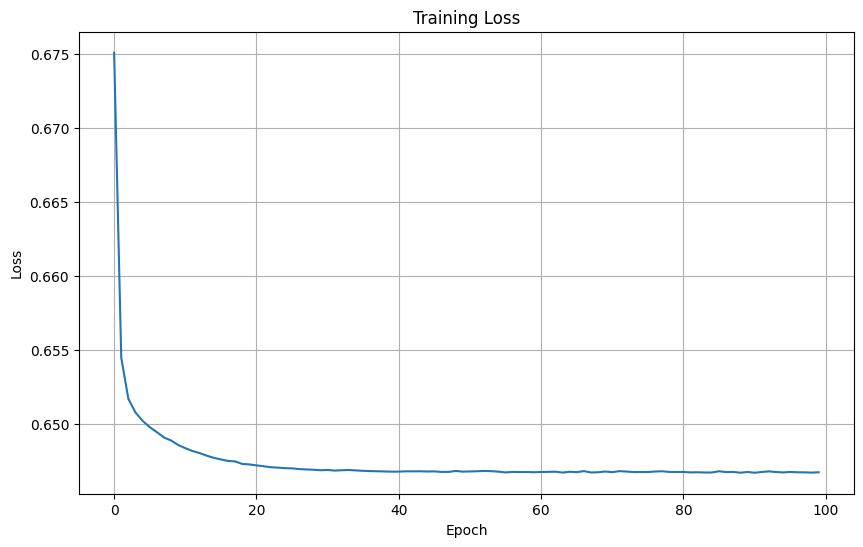

In [26]:
data = "diabetes.csv"
dataset = Diabetees_Dataset(data)
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

model = Diabetees_Model()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.BCELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = []
costs = []

for epoch in range(100):
    epochs.append(epoch)
    loss_num = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optim.zero_grad()
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)

        loss.backward()
        optim.step()

        loss_num += loss.item()

        if i % 10 == 0:
            print(f'Epoch {epoch}, Batch {i}, Loss: {loss.item():.4f}')

    avg_loss = loss_num / len(train_loader)
    costs.append(avg_loss)

plt.figure(figsize=(10, 6))
plt.plot(epochs, costs)
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()
